In [35]:
import sys
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams.update({'font.family':'arial'})

%matplotlib inline

# Merging and filtering allele output files

In [36]:
def merge_timepoints_A115(csv24h,csv12h,csv8h,csv4h,csv2h,csv1h,csv0h,output_csv):
    '''
    Function to merge the time points for a base editor time point experiment with allele outputs
    '''
    
    # opening the allele frequency files for each time point
    df_24 = pd.read_csv(csv24h)
    df_12 = pd.read_csv(csv12h)
    df_8 = pd.read_csv(csv8h)
    df_4 = pd.read_csv(csv4h)
    df_2 = pd.read_csv(csv2h)
    df_1 = pd.read_csv(csv1h)
    df_0 = pd.read_csv(csv0h)
    
    # filtering df_24 for alleles with >0.1% frequency
    df_24 = df_24[df_24['mean'] > 0.1]
    
    # merging the 12hr onto 24hr, keeping all alleles from the 24hr
    df_merge1 = pd.merge(left=df_24, right=df_12, how='left', left_on='target', right_on='target')
    df_merge1.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM']
    
    # merging the 8hr onto the previous merge
    df_merge2 = pd.merge(left=df_merge1, right=df_8, how='left', left_on='target', right_on='target')
    df_merge2.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM']
    
    # merging the 4hr onto the previous merge
    df_merge3 = pd.merge(left=df_merge2, right=df_4, how='left', left_on='target', right_on='target')
    df_merge3.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM']
    
    # merging the 2hr onto the previous merge
    df_merge4 = pd.merge(left=df_merge3, right=df_2, how='left', left_on='target', right_on='target')
    df_merge4.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM']
    
    # merging the 1hr onto the previous merge
    df_merge5 = pd.merge(left=df_merge4, right=df_1, how='left', left_on='target', right_on='target')
    df_merge5.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM',
                         '1h_rep1','1h_rep2','1h_rep3','1h_mean','1h_SEM']
    
    # merging the 0 hr onto the previous merge
    df_merge6 = pd.merge(left=df_merge5, right=df_0, how='left', left_on='target', right_on='target')
    df_merge6.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM',
                         '1h_rep1','1h_rep2','1h_rep3','1h_mean','1h_SEM',
                         '0h_rep1','0h_rep2','0h_rep3','0h_mean','0h_SEM']
    
    # exporting to new csv
    df_merge6.to_csv(output_csv,index=False)
    
    return(df_24)

In [37]:
def merge_timepoints_DMSO(df_A115,csv24h,csv12h,csv8h,csv4h,csv2h,csv1h,csv0h,output_csv):
    '''
    Function to merge the time points for a base editor time point experiment with allele outputs
    '''
    
    # opening the allele frequency files for each time point
    df_24 = pd.read_csv(csv24h)
    df_12 = pd.read_csv(csv12h)
    df_8 = pd.read_csv(csv8h)
    df_4 = pd.read_csv(csv4h)
    df_2 = pd.read_csv(csv2h)
    df_1 = pd.read_csv(csv1h)
    df_0 = pd.read_csv(csv0h)
    
    # merging the 24hr onto the 24hr A115 alleles
    df_merge = pd.merge(left=df_A115, right=df_24, how='left', left_on='target', right_on='target')
    df_merge.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                        '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM']
    
    # merging the 12hr onto 24hr, keeping all alleles from the 24hr
    df_merge1 = pd.merge(left=df_merge, right=df_12, how='left', left_on='target', right_on='target')
    df_merge1.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM']
    
    # merging the 8hr onto the previous merge
    df_merge2 = pd.merge(left=df_merge1, right=df_8, how='left', left_on='target', right_on='target')
    df_merge2.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM']
    
    # merging the 4hr onto the previous merge
    df_merge3 = pd.merge(left=df_merge2, right=df_4, how='left', left_on='target', right_on='target')
    df_merge3.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM']
    
    # merging the 2hr onto the previous merge
    df_merge4 = pd.merge(left=df_merge3, right=df_2, how='left', left_on='target', right_on='target')
    df_merge4.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM']
    
    # merging the 1hr onto the previous merge
    df_merge5 = pd.merge(left=df_merge4, right=df_1, how='left', left_on='target', right_on='target')
    df_merge5.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM',
                         '1h_rep1','1h_rep2','1h_rep3','1h_mean','1h_SEM']
    
    # merging the 0 hr onto the previous merge
    df_merge6 = pd.merge(left=df_merge5, right=df_0, how='left', left_on='target', right_on='target')
    df_merge6.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM',
                         '1h_rep1','1h_rep2','1h_rep3','1h_mean','1h_SEM',
                         '0h_rep1','0h_rep2','0h_rep3','0h_mean','0h_SEM']
    
    df_final = df_merge6.drop(columns=['A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM'])
    
    # exporting to new csv
    df_final.to_csv(output_csv,index=False)

In [38]:
# BE4max, ABE9
df_A115 = merge_timepoints_A115('Data/CBE_ABE9/24hr_BE4_F22_ABE8e4_A115_allelefreq.csv',
                                'Data/CBE_ABE9/12hr_BE4_F22_ABE8e4_A115_allelefreq.csv',
                                'Data/CBE_ABE9/8hr_BE4_F22_ABE8e4_A115_allelefreq.csv',
                                'Data/CBE_ABE9/4hr_BE4_F22_ABE8e4_A115_allelefreq.csv',
                                'Data/CBE_ABE9/2hr_BE4_F22_ABE8e4_A115_allelefreq.csv',
                                'Data/CBE_ABE9/1hr_BE4_F22_ABE8e4_A115_allelefreq.csv',
                                'Data/CBE_ABE9/0hr_BE4_F22_ABE8e4_allelefreq.csv',
                                'Data/merged/20211109_BE4max_ABE9_A115.csv')

merge_timepoints_DMSO(df_A115,
                     'Data/CBE_ABE9/24hr_BE4_F22_ABE8e4_DMSO_allelefreq.csv',
                     'Data/CBE_ABE9/12hr_BE4_F22_ABE8e4_DMSO_allelefreq.csv',
                     'Data/CBE_ABE9/8hr_BE4_F22_ABE8e4_DMSO_allelefreq.csv',
                     'Data/CBE_ABE9/4hr_BE4_F22_ABE8e4_DMSO_allelefreq.csv',
                     'Data/CBE_ABE9/2hr_BE4_F22_ABE8e4_DMSO_allelefreq.csv',
                     'Data/CBE_ABE9/1hr_BE4_F22_ABE8e4_DMSO_allelefreq.csv',
                     'Data/CBE_ABE9/0hr_BE4_F22_ABE8e4_allelefreq.csv',
                     'Data/merged/20211109_BE4max_ABE9_DMSO.csv')

In [39]:
# BE4max, EMX1
df_A115 = merge_timepoints_A115('Data/CBE_EMX1/24hr_BE4_F22_EMX1_A115_allelefreq.csv',
                                'Data/CBE_EMX1/12hr_BE4_F22_EMX1_A115_allelefreq.csv',
                                'Data/CBE_EMX1/8hr_BE4_F22_EMX1_A115_allelefreq.csv',
                                'Data/CBE_EMX1/4hr_BE4_F22_EMX1_A115_allelefreq.csv',
                                'Data/CBE_EMX1/2hr_BE4_F22_EMX1_A115_allelefreq.csv',
                                'Data/CBE_EMX1/1hr_BE4_F22_EMX1_A115_allelefreq.csv',
                                'Data/CBE_EMX1/0hr_BE4_F22_EMX1_allelefreq.csv',
                                'Data/merged/20211109_BE4max_EMX1_A115.csv')

merge_timepoints_DMSO(df_A115,
                     'Data/CBE_EMX1/24hr_BE4_F22_EMX1_DMSO_allelefreq.csv',
                     'Data/CBE_EMX1/12hr_BE4_F22_EMX1_DMSO_allelefreq.csv',
                     'Data/CBE_EMX1/8hr_BE4_F22_EMX1_DMSO_allelefreq.csv',
                     'Data/CBE_EMX1/4hr_BE4_F22_EMX1_DMSO_allelefreq.csv',
                     'Data/CBE_EMX1/2hr_BE4_F22_EMX1_DMSO_allelefreq.csv',
                     'Data/CBE_EMX1/1hr_BE4_F22_EMX1_DMSO_allelefreq.csv',
                     'Data/CBE_EMX1/0hr_BE4_F22_EMX1_allelefreq.csv',
                     'Data/merged/20211109_BE4max_EMX1_DMSO.csv')

In [40]:
# BE4max, HEK2
df_A115 = merge_timepoints_A115('Data/CBE_HEK2/24hr_BE4_F22_HEK2_A115_allelefreq.csv',
                                'Data/CBE_HEK2/12hr_BE4_F22_HEK2_A115_allelefreq.csv',
                                'Data/CBE_HEK2/8hr_BE4_F22_HEK2_A115_allelefreq.csv',
                                'Data/CBE_HEK2/4hr_BE4_F22_HEK2_A115_allelefreq.csv',
                                'Data/CBE_HEK2/2hr_BE4_F22_HEK2_A115_allelefreq.csv',
                                'Data/CBE_HEK2/1hr_BE4_F22_HEK2_A115_allelefreq.csv',
                                'Data/CBE_HEK2/0hr_BE4_F22_HEK2_allelefreq.csv',
                                'Data/merged/20211109_BE4max_HEK2_A115.csv')

merge_timepoints_DMSO(df_A115,
                     'Data/CBE_HEK2/24hr_BE4_F22_HEK2_DMSO_allelefreq.csv',
                     'Data/CBE_HEK2/12hr_BE4_F22_HEK2_DMSO_allelefreq.csv',
                     'Data/CBE_HEK2/8hr_BE4_F22_HEK2_DMSO_allelefreq.csv',
                     'Data/CBE_HEK2/4hr_BE4_F22_HEK2_DMSO_allelefreq.csv',
                     'Data/CBE_HEK2/2hr_BE4_F22_HEK2_DMSO_allelefreq.csv',
                     'Data/CBE_HEK2/1hr_BE4_F22_HEK2_DMSO_allelefreq.csv',
                     'Data/CBE_HEK2/0hr_BE4_F22_HEK2_allelefreq.csv',
                     'Data/merged/20211109_BE4max_HEK2_DMSO.csv')

In [41]:
def plot_CBE_timecourse(csv_A115,csv_DMSO,target_seq):
    '''
    Function to parse .csv files with A115 and DMSO allele frequencies for plotting
    '''
    # reading A115 data
    df_A115 = pd.read_csv(csv_A115,
                          usecols=['target','24h_mean','24h_SEM','12h_mean','12h_SEM',
                                   '8h_mean','8h_SEM','4h_mean','4h_SEM',
                                   '2h_mean','2h_SEM','1h_mean','1h_SEM',
                                   '0h_mean','0h_SEM'])
    # filling all NaN with 0
    df_A115 = df_A115.fillna(0)
    
    # making an A115 dataframe with just the mean values for filtering
    df_A115_2 = pd.read_csv(csv_A115,
                            usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                                     '2h_mean','1h_mean','0h_mean'])
    # filling all NaN with 0
    df_A115_2 = df_A115_2.fillna(0)
    
    # getting a list of target sites where editing >0.3% at least one time point
    df_filter_list = list(df_A115_2['target'][df_A115_2.max(axis = 1) > 0.3])
    # filtering df_A115 for those in the filter list (>0.3% at any time point)
    df_A115 = df_A115[df_A115.target.isin(df_filter_list)].reset_index(drop=True)
    
    # reading DMSO data
    df_DMSO = pd.read_csv(csv_DMSO,
                          usecols=['target','24h_mean','24h_SEM','12h_mean','12h_SEM',
                                   '8h_mean','8h_SEM','4h_mean','4h_SEM',
                                   '2h_mean','2h_SEM','1h_mean','1h_SEM',
                                   '0h_mean','0h_SEM'])
    # filling all NaN with 0
    df_DMSO = df_DMSO.fillna(0)
    # filtering df_DMSO for those in the filter list
    df_DMSO = df_DMSO[df_DMSO.target.isin(df_filter_list)].reset_index(drop=True)
    
    # filtering for targets that only have edits at the adenines
    unedited_seq = target_seq
    unedited = list(unedited_seq)
    correct_edited_target = []
    # for loop to take out the non-A>G edits
    for row,target in enumerate(df_A115['target']):
        wrong_mut = 0
        for i,n in enumerate(target):
            if (unedited[i]=='A' and n!='A') or (unedited[i]=='G' and n!='G') or (unedited[i]=='T' and n!='T'):
                wrong_mut += 1
        if wrong_mut == 0:
            correct_edited_target.append(target) 
    # filtering dataframes for edited targets only at the A's
    df_A115 = df_A115[df_A115.target.isin(correct_edited_target)].reset_index(drop=True)
    df_DMSO = df_DMSO[df_DMSO.target.isin(correct_edited_target)].reset_index(drop=True)
    
    # sorting the dataframe by frequency at 24hr
    df_A115 = df_A115.sort_values(by=['24h_mean'],ascending=False).reset_index(drop=True)
    # list to sort all the DMSO dataframe
    df_order = list(df_A115['target'])
    
    # sorting DMSO data to order
    df_DMSO['cat'] = pd.Categorical(df_DMSO['target'],categories = df_order,ordered=True)
    df_DMSO = df_DMSO.sort_values(by='cat').reset_index(drop=True)
    
    # making an A115 dataframe with just the mean values
    df_A115_data = df_A115[['24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean']].copy()
    df_A115_data = df_A115_data[df_A115_data.columns[::-1]]
    
    # making a DMSO dataframe with just the mean values
    df_DMSO_data = df_DMSO[['24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean']].copy()
    df_DMSO_data = df_DMSO_data[df_DMSO_data.columns[::-1]]
    
    
    # making an A115 dataframe with just the SEM values
    df_A115_SEM = df_A115[['24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                           '2h_SEM','1h_SEM','0h_SEM']].copy()
    df_A115_SEM = df_A115_SEM[df_A115_SEM.columns[::-1]]

    # making a DMSO dataframe with just the mean values
    df_DMSO_SEM = df_DMSO[['24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                           '2h_SEM','1h_SEM','0h_SEM']].copy()
    df_DMSO_SEM = df_DMSO_SEM[df_DMSO_SEM.columns[::-1]]
    
    return(df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM)

# ABE9

In [42]:
df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM = plot_CBE_timecourse('Data/merged/20211109_BE4max_ABE9_A115.csv',
                                                                                        'Data/merged/20211109_BE4max_ABE9_DMSO.csv',
                                                                                        'GAAGACCAAGGATAGACTGC')

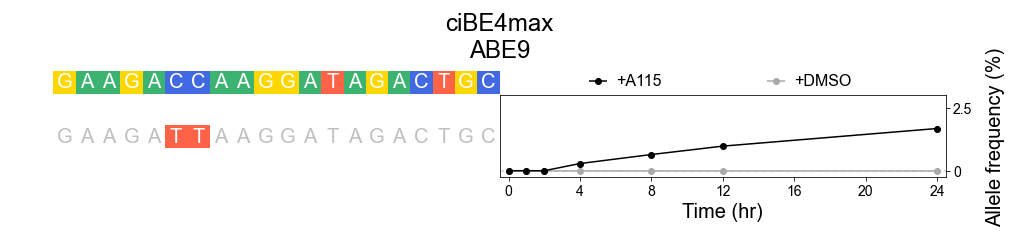

In [43]:
ref = 'GAAGACCAAGGATAGACTGC'
plt.rc('font', size=20)

fig, ax = plt.subplots(len(df_A115_data),2,figsize=(16,len(df_A115_data)*1.5),gridspec_kw={'width_ratios': [1,1]})

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

timepoints = [0,1,2,4,8,12,24]

target_row = 0

for i, ax in enumerate(fig.axes):
    if i%2 == 0:
        ax.set_xlim([0,20])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if df_A115.iloc[target_row]['target'] == ref:
            ax.set_ylim([0.45,0.75])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == 'A':
                    ax.scatter(x+0.5,0.5,s=450,c='mediumseagreen',marker='s')
                    ax.text(x+0.5,0.5, 'A', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'C':
                    ax.scatter(x+0.5,0.5,s=450,c='royalblue',marker='s')
                    ax.text(x+0.5,0.5, 'C', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'G':
                    ax.scatter(x+0.5,0.5,s=450,c='gold',marker='s')
                    ax.text(x+0.5,0.5, 'G', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'T':
                    ax.scatter(x+0.5,0.5,s=450,c='tomato',marker='s')
                    ax.text(x+0.5,0.5, 'T', ha='center',va='center',color='white',size=20)
        else:
            ax.set_ylim([0.95,1.05])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == ref[x]:
                    ax.text(x+0.5,1, nucleotide, ha='center',va='center',color='silver',size=20)
                else:
                    if nucleotide == 'A':
                        ax.scatter(x+0.5,1,s=450,c='mediumseagreen',marker='s')
                        ax.text(x+0.5,1, 'A', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'C':
                        ax.scatter(x+0.5,1,s=450,c='royalblue',marker='s')
                        ax.text(x+0.5,1, 'C', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'G':
                        ax.scatter(x+0.5,1,s=450,c='gold',marker='s')
                        ax.text(x+0.5,1, 'G', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'T':
                        ax.scatter(x+0.5,1,s=450,c='tomato',marker='s')
                        ax.text(x+0.5,1, 'T', ha='center',va='center',color='white',size=20)
        target_row+=1
    else:
        if i != len(df_A115_data)*2-1:
            ax.get_xaxis().set_visible(False)
        if i == 1:
            ax.get_yaxis().set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.yaxis.tick_right()
        ax.set_xlim([-0.5,24.5])
        
fig.axes[3].errorbar(timepoints,df_DMSO_data.iloc[1],yerr=df_DMSO_SEM.iloc[1],fmt='-o',color='darkgrey')
fig.axes[3].errorbar(timepoints,df_A115_data.iloc[1],yerr=df_A115_SEM.iloc[1],fmt='-o',color='black')
fig.axes[3].set_ylim([-0.25,3])
fig.axes[3].set_yticks([0,2.5])
fig.axes[3].set_yticklabels([0,2.5],fontsize=14)
fig.axes[3].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[3].set_xlabel('Time (hr)',fontsize=20)
fig.axes[3].set_xticklabels(timepoints,fontsize=14)
fig.axes[3].set_xticks([0,4,8,12,16,20,24])
fig.axes[3].set_xticklabels([0,4,8,12,16,20,24],fontsize=14)

fig.add_subplot(1,1,1, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.axes[4].yaxis.set_label_position('right')
fig.axes[4].set_ylabel('Allele frequency (%)',labelpad=40,position=(2,0.25),fontsize=20)

fig.axes[1].errorbar(5,0.5,xerr=0.5,fmt='o',color='black')
fig.axes[1].text(6,0.5,'+A115', ha='left',va='center',color='black',size=16)
fig.axes[1].errorbar(15,0.5,xerr=0.5,fmt='o',color='darkgrey')
fig.axes[1].text(16,0.5,'+DMSO', ha='left',va='center',color='black',size=16)
fig.axes[1].set_ylim([0,2.75])

plt.title('ciBE4max\nABE9',y=0.7)

plt.savefig('ExportedPlots/BE4max_ABE9_allelefreq_timecourse_20211109.svg',dpi=300,bbox_inches='tight')

# EMX1

In [44]:
df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM = plot_CBE_timecourse('Data/merged/20211109_BE4max_EMX1_A115.csv',
                                                                                        'Data/merged/20211109_BE4max_EMX1_DMSO.csv',
                                                                                        'GAGTCCGAGCAGAAGAAGAA')

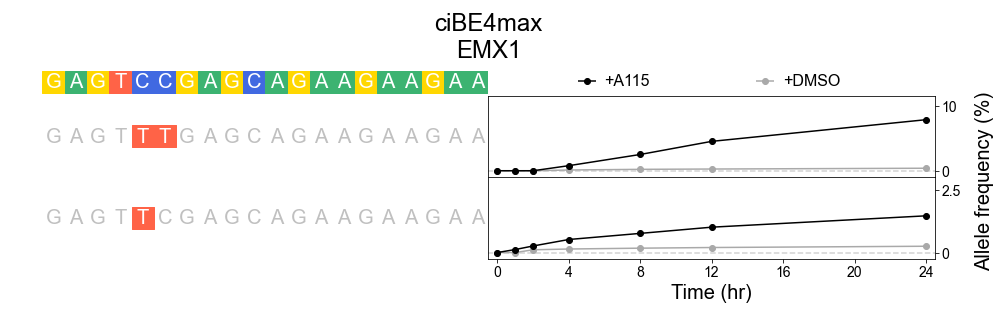

In [45]:
ref = 'GAGTCCGAGCAGAAGAAGAA'
plt.rc('font', size=20)

fig, ax = plt.subplots(len(df_A115_data),2,figsize=(16,len(df_A115)*1.5),gridspec_kw={'width_ratios': [1,1]})

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

timepoints = [0,1,2,4,8,12,24]

target_row = 0

for i, ax in enumerate(fig.axes):
    if i%2 == 0:
        ax.set_xlim([0,20])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if df_A115.iloc[target_row]['target'] == ref:
            ax.set_ylim([0.45,0.75])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == 'A':
                    ax.scatter(x+0.5,0.5,s=450,c='mediumseagreen',marker='s')
                    ax.text(x+0.5,0.5, 'A', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'C':
                    ax.scatter(x+0.5,0.5,s=450,c='royalblue',marker='s')
                    ax.text(x+0.5,0.5, 'C', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'G':
                    ax.scatter(x+0.5,0.5,s=450,c='gold',marker='s')
                    ax.text(x+0.5,0.5, 'G', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'T':
                    ax.scatter(x+0.5,0.5,s=450,c='tomato',marker='s')
                    ax.text(x+0.5,0.5, 'T', ha='center',va='center',color='white',size=20)
        else:
            ax.set_ylim([0.95,1.05])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == ref[x]:
                    ax.text(x+0.5,1, nucleotide, ha='center',va='center',color='silver',size=20)
                else:
                    if nucleotide == 'A':
                        ax.scatter(x+0.5,1,s=450,c='mediumseagreen',marker='s')
                        ax.text(x+0.5,1, 'A', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'C':
                        ax.scatter(x+0.5,1,s=450,c='royalblue',marker='s')
                        ax.text(x+0.5,1, 'C', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'G':
                        ax.scatter(x+0.5,1,s=450,c='gold',marker='s')
                        ax.text(x+0.5,1, 'G', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'T':
                        ax.scatter(x+0.5,1,s=450,c='tomato',marker='s')
                        ax.text(x+0.5,1, 'T', ha='center',va='center',color='white',size=20)
        target_row+=1
    else:
        if i != len(df_A115_data)*2-1:
            ax.get_xaxis().set_visible(False)
        if i == 1:
            ax.get_yaxis().set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.yaxis.tick_right()
        ax.set_xlim([-0.5,24.5])
        
fig.axes[3].errorbar(timepoints,df_DMSO_data.iloc[1],yerr=df_DMSO_SEM.iloc[1],fmt='-o',color='darkgrey')
fig.axes[3].errorbar(timepoints,df_A115_data.iloc[1],yerr=df_A115_SEM.iloc[1],fmt='-o',color='black')
fig.axes[3].set_ylim([-1,11.5])
fig.axes[3].set_yticks([0,10])
fig.axes[3].set_yticklabels([0,10],fontsize=14)
fig.axes[3].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[5].errorbar(timepoints,df_DMSO_data.iloc[2],yerr=df_DMSO_SEM.iloc[2],fmt='-o',color='darkgrey')
fig.axes[5].errorbar(timepoints,df_A115_data.iloc[2],yerr=df_A115_SEM.iloc[2],fmt='-o',color='black')
fig.axes[5].set_ylim([-0.25,3])
fig.axes[5].set_yticks([0,2.5])
fig.axes[5].set_yticklabels([0,2.5],fontsize=14)
fig.axes[5].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[5].set_xlabel('Time (hr)',fontsize=20)
fig.axes[5].set_xticklabels(timepoints,fontsize=14)
fig.axes[5].set_xticks([0,4,8,12,16,20,24])
fig.axes[5].set_xticklabels([0,4,8,12,16,20,24],fontsize=14)

fig.add_subplot(1,1,1, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.axes[6].yaxis.set_label_position('right')
fig.axes[6].set_ylabel('Allele frequency (%)',labelpad=40,position=(2,0.32),fontsize=20)

fig.axes[1].errorbar(5,0.5,xerr=0.5,fmt='o',color='black')
fig.axes[1].text(6,0.5,'+A115', ha='left',va='center',color='black',size=16)
fig.axes[1].errorbar(15,0.5,xerr=0.5,fmt='o',color='darkgrey')
fig.axes[1].text(16,0.5,'+DMSO', ha='left',va='center',color='black',size=16)
fig.axes[1].set_ylim([0,2.75])

plt.title('ciBE4max\nEMX1',y=0.80)

plt.savefig('ExportedPlots/BE4max_EMX1_allelefreq_timecourse_20211109.svg',dpi=300,bbox_inches='tight')

# HEK2

In [46]:
df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM = plot_CBE_timecourse('Data/merged/20211109_BE4max_HEK2_A115.csv',
                                                                                        'Data/merged/20211109_BE4max_HEK2_DMSO.csv',
                                                                                        'GAACACAAAGCATAGACTGC')

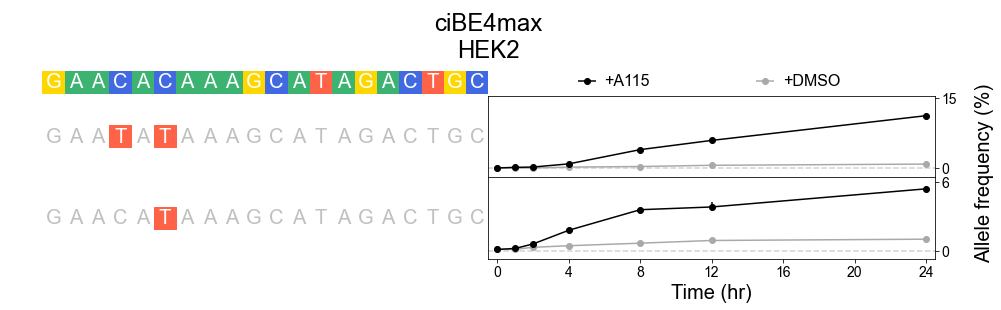

In [47]:
ref = 'GAACACAAAGCATAGACTGC'
plt.rc('font', size=20)

fig, ax = plt.subplots(len(df_A115_data),2,figsize=(16,len(df_A115_data)*1.5),gridspec_kw={'width_ratios': [1,1]})

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

timepoints = [0,1,2,4,8,12,24]

target_row = 0

for i, ax in enumerate(fig.axes):
    if i%2 == 0:
        ax.set_xlim([0,20])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if df_A115.iloc[target_row]['target'] == ref:
            ax.set_ylim([0.45,0.75])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == 'A':
                    ax.scatter(x+0.5,0.5,s=450,c='mediumseagreen',marker='s')
                    ax.text(x+0.5,0.5, 'A', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'C':
                    ax.scatter(x+0.5,0.5,s=450,c='royalblue',marker='s')
                    ax.text(x+0.5,0.5, 'C', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'G':
                    ax.scatter(x+0.5,0.5,s=450,c='gold',marker='s')
                    ax.text(x+0.5,0.5, 'G', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'T':
                    ax.scatter(x+0.5,0.5,s=450,c='tomato',marker='s')
                    ax.text(x+0.5,0.5, 'T', ha='center',va='center',color='white',size=20)
        else:
            ax.set_ylim([0.95,1.05])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == ref[x]:
                    ax.text(x+0.5,1, nucleotide, ha='center',va='center',color='silver',size=20)
                else:
                    if nucleotide == 'A':
                        ax.scatter(x+0.5,1,s=450,c='mediumseagreen',marker='s')
                        ax.text(x+0.5,1, 'A', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'C':
                        ax.scatter(x+0.5,1,s=450,c='royalblue',marker='s')
                        ax.text(x+0.5,1, 'C', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'G':
                        ax.scatter(x+0.5,1,s=450,c='gold',marker='s')
                        ax.text(x+0.5,1, 'G', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'T':
                        ax.scatter(x+0.5,1,s=450,c='tomato',marker='s')
                        ax.text(x+0.5,1, 'T', ha='center',va='center',color='white',size=20)
        target_row+=1
    else:
        if i != len(df_A115_data)*2-1:
            ax.get_xaxis().set_visible(False)
        if i == 1:
            ax.get_yaxis().set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.yaxis.tick_right()
        ax.set_xlim([-0.5,24.5])
        
fig.axes[3].errorbar(timepoints,df_DMSO_data.iloc[1],yerr=df_DMSO_SEM.iloc[1],fmt='-o',color='darkgrey')
fig.axes[3].errorbar(timepoints,df_A115_data.iloc[1],yerr=df_A115_SEM.iloc[1],fmt='-o',color='black')
fig.axes[3].set_ylim([-2,15.5])
fig.axes[3].set_yticks([0,15])
fig.axes[3].set_yticklabels([0,15],fontsize=14)
fig.axes[3].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[5].errorbar(timepoints,df_DMSO_data.iloc[2],yerr=df_DMSO_SEM.iloc[2],fmt='-o',color='darkgrey')
fig.axes[5].errorbar(timepoints,df_A115_data.iloc[2],yerr=df_A115_SEM.iloc[2],fmt='-o',color='black')
fig.axes[5].set_ylim([-0.75,7.5])
fig.axes[5].set_yticks([0,7])
fig.axes[5].set_yticklabels([0,6],fontsize=14)
fig.axes[5].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[5].set_xlabel('Time (hr)',fontsize=20)
fig.axes[5].set_xticklabels(timepoints,fontsize=14)
fig.axes[5].set_xticks([0,4,8,12,16,20,24])
fig.axes[5].set_xticklabels([0,4,8,12,16,20,24],fontsize=14)

fig.add_subplot(1,1,1, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.axes[6].yaxis.set_label_position('right')
fig.axes[6].set_ylabel('Allele frequency (%)',labelpad=40,position=(2,0.35),fontsize=20)

fig.axes[1].errorbar(5,0.5,xerr=0.5,fmt='o',color='black')
fig.axes[1].text(6,0.5,'+A115', ha='left',va='center',color='black',size=16)
fig.axes[1].errorbar(15,0.5,xerr=0.5,fmt='o',color='darkgrey')
fig.axes[1].text(16,0.5,'+DMSO', ha='left',va='center',color='black',size=16)
fig.axes[1].set_ylim([0,2.75])

plt.title('ciBE4max\nHEK2',y=0.8)

plt.savefig('ExportedPlots/BE4max_HEK2_allelefreq_timecourse_20211109.svg',dpi=300,bbox_inches='tight')